In [97]:
# -*- coding: utf-8 -*-
# <nbformat>3.0</nbformat>

# <codecell>

# coding: utf-8
%matplotlib inline
import matplotlib
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
from matplotlib import rc ## desnec?essário
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams.update({'font.size': 22})


'''
Method of lines - Intraguild Predation + Diffusion
Quimiostatic growth for resource
Already using adimensionlization
'''

#Discretização
M = 101 #espaço
N = 20000 #tempo
Tmax = 20000.0

In [98]:
# -------------------- Funcional Response - IGP

'''
f_R(R,C1,C2) = mu - phi*R - C1*R - C2*R 

f_C1(R,C1,C2) = C1*R - C1 - alpha*C1*C2 

f_C2(R,C1,C2) = m*gamma*C2*R - m*C2 + beta*alpha*C1*C2
'''

def f_R(R, C1, C2):
    return mu - R - C1*R - C2*R 

def f_C1(R, C1, C2):
    return C1*R - m1*C1 - alpha*C1*C2 

def f_C2(R, C1, C2):
    return (m2/m1)*gamma*C2*R - m2*C2 + beta*alpha*C1*C2

In [99]:
#inicialize as populações
def init(M,amplitude):
    
    #Populações iniciais - sino
    x = np.linspace(0,np.pi,M)
    
    if d_r > 0:
    
        R0 = amplitude*np.sin(x)
        
    elif d_r == 0:
        
        R0 = amplitude*np.ones(len(x))
        
    C10 = amplitude*np.sin(x)
    C20 = amplitude*np.sin(x)
    
    del x
    
    '''
    #Populações iniciais - step function
    
    R0 = np.zeros(M)
    C10 = np.zeros(M)
    C20 = np.zeros(M)
    
    R_0 = 1.0
    C1_0 = 1.0
    C2_0 = 1.0
    for i in range(0,M):
        if i >= 0.3*M and i < 0.7*M:
            R0[i] = R_0
            C10[i] = C1_0
            C20[i] = C2_0
            
    '''
    
    return R0,C10,C20

In [100]:
def ddt(y,t):
    
    #discret
    h = np.pi/(M-1)
    
    #c.contorno (Dirichlet)
    if d_r > 0:
        
        dRdt = np.zeros(M)
        dC1dt = np.zeros(M)
        dC2dt = np.zeros(M)

        R = y[0:M]
        C1 = y[M:2*M]
        C2 = y[2*M:]

        R[0] = 0
        C1[0] = 0
        C2[0] = 0
        R[-1] = 0
        C1[-1] = 0
        C2[-1] = 0

        dRdt[1:M-1] = d_r*(R[2:M] - 2*R[1:M-1] + R[0:M-2])/(h**2) + f_R(R[1:M-1],C1[1:M-1],C2[1:M-1])
        dC1dt[1:M-1] = d_1*(C1[2:M] - 2*C1[1:M-1] + C1[0:M-2])/(h**2) + f_C1(R[1:M-1],C1[1:M-1],C2[1:M-1])
        dC2dt[1:M-1] = d_2*(C2[2:M] - 2*C2[1:M-1] + C2[0:M-2])/(h**2) + f_C2(R[1:M-1],C1[1:M-1],C2[1:M-1])
        
    #c. contorno: Dirichlet, mas com d_r = 0 (portanto, não sofre CC)
    elif d_r == 0:
        
        dRdt = np.zeros(M)
        dC1dt = np.zeros(M)
        dC2dt = np.zeros(M)

        R = y[0:M]
        C1 = y[M:2*(M)]
        C2 = y[2*(M):]

        C1[0] = 0
        C2[0] = 0

        C1[-1] = 0
        C2[-1] = 0

        dRdt[0:M] = f_R(R[0:M],C1[0:M],C2[0:M])
        dC1dt[1:M-1] = d_1*(C1[2:M] - 2*C1[1:M-1] + C1[0:M-2])/(h**2) + f_C1(R[1:M-1],C1[1:M-1],C2[1:M-1])
        dC2dt[1:M-1] = d_2*(C2[2:M] - 2*C2[1:M-1] + C2[0:M-2])/(h**2) + f_C2(R[1:M-1],C1[1:M-1],C2[1:M-1])
    
    '''
    #c. contorno (Neumann) - Lembre de mudar M para M+2!
    
    dRdt = np.zeros(M+2)
    dC1dt = np.zeros(M+2)
    dC2dt = np.zeros(M+2)
    
    R = y[0:M+2]
    C1 = y[M+2:2*(M+2)]
    C2 = y[2*(M+2):]
    
    R[0] = R[1]
    C1[0] = C1[1]
    C2[0] = C2[1]
    R[-1] = R[-2]
    C1[-1] = C1[-2]
    C2[-1] = C2[-2]
    
    for m in range(1,M+1):
        
        dRdt[m] = d_r*(R[m+1] - 2*R[m] + R[m-1])/(h**2) #+ f_R(R[1:M-1],C1[1:M-1],C2[1:M-1])
        dC1dt[m] = d_1*(C1[m+1] - 2*C1[m] + C1[m-1])/(h**2) #+ f_C1(R[1:M-1],C1[1:M-1],C2[1:M-1])
        dC2dt[m] = d_2*(C2[m+1] - 2*C2[m] + C2[m-1])/(h**2) #+ f_C2(R[1:M-1],C1[1:M-1],C2[1:M-1])
    '''
    '''
       
    #c. contorno: (Neumann para R e Dirichlet p/ Cs) - Lembre de mudar o grid de M para M+2!
    
    dRdt = np.zeros(M+2) #Os ddts nunca são calculados nas extremidades? Posso deixar como zero?
    dC1dt = np.zeros(M+2)
    dC2dt = np.zeros(M+2)
    
    R = y[0:M+2]
    C1 = y[M+2:2*(M+2)]
    C2 = y[2*(M+2):]
    
    R[0] = R[1]
    C1[1] = 0
    C2[1] = 0
    
    R[-1] = R[-2]
    C1[-2] = 0
    C2[-2] = 0
            
    dRdt[1:M+1] = d_r*(R[2:M+2] - 2*R[1:M+1] + R[0:M])/(h**2) + f_R(R[1:M+1],C1[1:M+1],C2[1:M+1])    
        
    dC1dt[2:M] = d_1*(C1[3:M+1] - 2*C1[2:M] + C1[1:M-1])/(h**2) + f_C1(R[2:M],C1[2:M],C2[2:M])
    dC2dt[2:M] = d_2*(C2[3:M+1] - 2*C2[2:M] + C2[1:M-1])/(h**2) + f_C2(R[2:M],C1[2:M],C2[2:M])
    '''

    return np.r_[dRdt,dC1dt,dC2dt]

In [101]:
#Funções que calculam os mu_i, deduzidos pelo MÉTODO VARIACIONAL, R, C1, C2 em Dirichlet
def mu_1():
    #R Difunde: R = B1*sin(x) 
    if d_r > 0:
        return 3*(np.pi**2)*(1+d_r)*(m1+d_1)/32
    
    elif d_r == 0:
        return 1*(m1+d_1)

def mu_2():
    #R Difunde: R = B1*sin(x) 
    if d_r > 0:
        return (3*np.pi**2)*(m2 + d_2 - (m2/m1)*gamma*(m1+d_1))*(m1+d_1)/(32*beta*alpha) + (3*np.pi**2)*(1+d_r)*(m1+d_1)/32
    
    elif d_r == 0:
        #mathematica
        return ((d_1 + m1)*
            (m1**2*(-3*(d_2 + m2)**2*np.pi**2*(-32 + 3*np.pi**2) + 
            32*(d_2 + m2)*np.pi**2*alpha*beta + 128*(-8 + np.pi**2)*alpha**2*beta**2) + 
            2*m1*(d_1 + m1)*m2*np.pi**2*(3*(d_2 + m2)*(-32 + 3*np.pi**2) - 16*alpha*beta)*gamma - 
            3*(d_1 + m1)**2*m2**2*np.pi**2*(-32 + 3*np.pi**2)*gamma**2))/(32.*m1*alpha*beta*(-(m1*(d_2 + m2)*(-32 + 3*np.pi**2)) + 
            4*m1*(-8 + np.pi**2)*alpha*beta + (d_1 + m1)*m2*(-32 + 3*np.pi**2)*gamma))

def mu_3():
    #R Difunde: R = B1*sin(x) 
    if d_r > 0:
        return (3*np.pi**2)*(m2 + d_2)*((m2+d_2)/((m2/m1)*gamma) - m1 - d_1)/(32*(m2/m1)*gamma*alpha) + (3*np.pi**2)*(m2 + d_2)*(1+d_r)/(32*(m2/m1)*gamma)
        
    elif d_r == 0:
        #mathematica
        return (m1*(d_2 + m2)*(-3*m1**2*(d_2 + m2)**2*np.pi**2*(-32 + 3*np.pi**2) + 
            2*m1*m2*(d_2 + m2)*np.pi**2*(3*(d_1 + m1)*(-32 + 3*np.pi**2) + 16*alpha)*gamma -
            m2**2*(3*(d_1 + m1)**2*np.pi**2*(-32 + 3*np.pi**2) + 
            32*(d_1 + m1)*np.pi**2*alpha - 
            128*(-8 + np.pi**2)*alpha**2)*gamma**2))/(32.*m2**2*alpha*gamma**2*(-(m1*(d_2 + m2)*(-32 + 3*np.pi**2)) + 
            m2*((d_1 + m1)*(-32 + 3*np.pi**2) + 4*(-8 + np.pi**2)*alpha)*gamma))

def mu_4():
    #R Difunde: R = B1*sin(x) 
    if d_r > 0:
        return 3*(np.pi**2)*(1+d_r)*(m2+d_2)/(32*(m2/m1)*gamma)
    
    elif d_r == 0:
        return 1*(m2+d_2)/((m2/m1)*gamma)

In [102]:
#Calcula a estimativa do "L Crítico" (?) a partir do método variacional
#Obs: Na verdade, é o L' = L*sqrt(m_1)/pi
def Lc():
    return np.sqrt((D2/m2 - D1*gamma/m1)*1/(gamma - 1))
    

In [86]:
#Integre um caso aqui
l = 3 + 0.12*6
mu = 0.7 + 0.13*4
m1 = 1.05
m2 = 0.95
gamma = 1.4
alpha = 0.9
beta = 0.9
amplitude = 1
D1 = 2.0
D2 = 8.0
DR = 0.0
d_r = DR/l**2
d_1 = D1/l**2
d_2 = D2/l**2
t = np.linspace(0,Tmax,N)
#pop inicial
R0,C10,C20 = init(M,amplitude)
y0 = np.r_[R0,C10,C20]
sol = scipy.integrate.odeint(ddt,y0,t) 
sol = np.array(sol)
np.save('Method_Of_LinesIGP_amplitude=%d,l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f.npy'
            % (amplitude,l,DR,D1,D2,mu,gamma),sol)

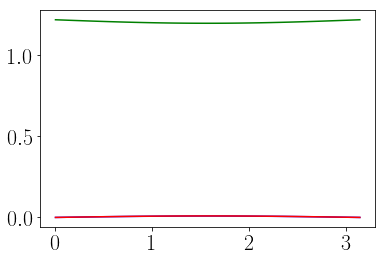

In [93]:
#plot no espaço
l = 3 + 0.12*6
mu = 0.7 + 0.13*4
m1 = 1.05
m2 = 0.95
gamma = 1.4
alpha = 0.9
beta = 0.9
amplitude = 10
D1 = 2.0
D2 = 8.0
DR = 0.0

sol = np.load('Method_Of_LinesIGP_amplitude=%d,l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f.npy'
            % (amplitude,l,DR,D1,D2,mu,gamma))

R = np.transpose(sol[:,0:M])
C1 = np.transpose(sol[:,M:2*(M)])
C2 = np.transpose(sol[:,2*(M):])
x = np.linspace(0,np.pi,M)
plt.plot(x,R[0:M,-20],color = 'green')
plt.plot(x,C1[0:M,-20],color = 'blue')
plt.plot(x,C2[0:M,-20],color = 'red')

#plt.axis([0,np.pi,0,10])

0.008800428771161264
1.22
0.00925259623980741


[0, 20000, 0, 15]

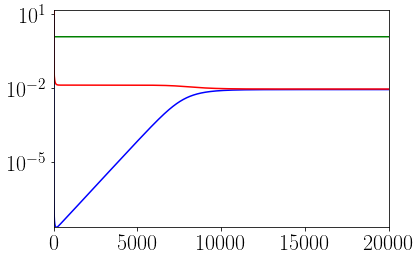

In [94]:
#maximo do patch no tempo (ver se a população está constante mesmo,por exemplo)
#Integre um caso aqui

#sol = np.load('Method_Of_LinesIGP_amplitude=%d,l=%.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f,alpha=%.f,beta=%.f.npy'
       # % (amplitude,l,DR,D1,D2,mu,gamma,alpha,beta))

t = np.linspace(0,Tmax,N)
R = np.transpose(sol[:,0:M])
C1 = np.transpose(sol[:,M:2*M])
C2 = np.transpose(sol[:,2*M:])

plt.plot(t,np.amax(R[:,:],axis = 0),color = 'green')
plt.plot(t,np.amax(C1[:,:],axis = 0),color = 'blue')
plt.plot(t,np.amax(C2[:,:],axis =0),color = 'red')

plt.yscale("log")

print(np.max(C1[:,-1]))
print(np.max(R[:,-1]))
print(np.max(C2[:,-1]))

plt.axis([0,20000,0,15])

In [7]:
#Faça para vários dR, d1, d2, mu
DR = []
D1 = []
D2 = []
MU = [0.0 + i for i in range(0,140)]
t = np.linspace(0,Tmax,N)
m1 = 1.05
m2 = 0.95
gamma = 0.5
alpha = 1
beta = 1
#pop inicial
R0,C10,C20 = init(M)
y0 = np.r_[R0,C10,C20]
for d_r in DR:
    print("d_r = " + str(d_r))
    for d_1 in D1:
        print("d_1 = " + str(d_1))
        for d_2 in D2:
            print("d_2 = " + str(d_2))
            for mu in MU:
                print("mu = " + str(mu))
                sol = scipy.integrate.odeint(ddt,y0,t)
                sol = np.array(sol)
                np.save('Method_Of_LinesIGP_dR=%.3f,d1=%.3f,d2=%.3f,mu=%.3f,alpha=%.3f,gamma=%.3f,beta=%.f'
                        % (d_r,d_1,d_2,mu,alpha,gamma,beta),sol)

[0, 140, 0, 20]

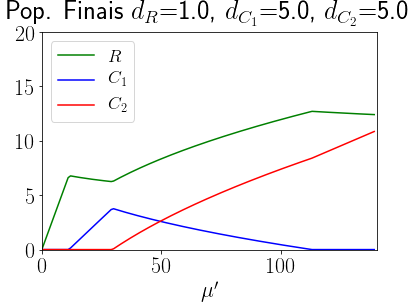

In [21]:
#Imprima a população final
DR = [1]
D1 = [5]
D2 = [5]
MU = [0.0 + i for i in range(0,140)]
m = 1.0
gamma = 0.5
alpha = 1
beta = 1
phi = 1.0

Rfinal = []
C1final = []
C2final = []
t = np.linspace(0,Tmax,N)
for d_r in DR:
    for d_1 in D1:
        for d_2 in D2:
            for mu in MU:
                sol = np.load('Method_Of_LinesIGP_dR=%.3f,d1=%.3f,d2=%.3f,mu=%.3f,alpha=%.3f,gamma=%.3f,beta=%.f.npy'
                              % (d_r,d_1,d_2,mu,alpha,gamma,beta))
                R = np.transpose(sol[:,0:M])
                C1 = np.transpose(sol[:,M:2*M])
                C2 = np.transpose(sol[:,2*M:])
                Rfinal.append(R[M/2,-1])
                C1final.append(C1[M/2,-1])
                C2final.append(C2[M/2,-1])

plt.plot(MU,Rfinal,color = 'green', label = r'$R$')
plt.plot(MU,C1final,color = 'blue', label = r'$C_1$')
plt.plot(MU,C2final,color = 'red', label = r'$C_2$')
plt.xlabel(r"$\mu'$")
plt.legend(loc = 'upper left', prop={'size': 18})
plt.title(r'Pop. Finais $d_R$=%.1f, $d_{C_1}$=%.1f, $d_{C_2}$=%.1f' % (d_r,d_1,d_2))
plt.axis([0,140,0,20])
#plt.axvline(x=mu_1(), color='black', linestyle='--')
#plt.axvline(x=mu_2(), color='black', linestyle='--')
#plt.axvline(x=mu_3(), color='black', linestyle='--')
#print (mu_1(),mu_2(),mu_3())
#plt.savefig('Method_Of_LinesIGP_dR=%.3f,d1=%.3f,d2=%.3f,mu=%.3f,alpha=%.3f,gamma=%.3f,beta=%.f,phi=%.3f,m=%.3f.png'
                              #% (d_r,d_1,d_2,mu,alpha,gamma,beta,phi,m))

# R = np.transpose(sol[:,0:M]) np.shape(R)

In [109]:
#Gera os dados para fazer o gráfico L x mu
Nl = 10 #Número de pontos de L
Nmu = 10 #Número de pontos de MU
L = [3 + 0.12*j for j in range(0,Nl)]
MU = [0.7 + 0.13*i for i in range(0,Nmu)]
t = np.linspace(0,Tmax,N)
m1 = 1.05
m2 = 0.95
gamma = 1.4
alpha = 0.9
beta = 0.9
amplitude = 1

#pop inicial
R0,C10,C20 = init(M,amplitude)
y0 = np.r_[R0,C10,C20]

D = [[2,8,0]]
for d in D:
    print("D = " + str(d))
    D1,D2,DR = d[0],d[1],d[2]
    for l in L:
        d_1 = D1/(l**2) #O Numerador é o D do modelo antes de adimensionalizar!
        d_2 = D2/(l**2)
        d_r = DR/(l**2)
        for mu in MU:
            sol = scipy.integrate.odeint(ddt,y0,t)
            sol = np.array(sol)
            np.save('Method_Of_LinesIGP_amplitude=%d,l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f'
                    % (amplitude,l,DR,D1,D2,mu,gamma),sol)

D = [2, 8, 0]


In [114]:
#faz o gráfico L x mu
#Parte 1) Leia os dados, pegue o maximo das densidades no instante final
Nl = 10 #Número de pontos de L
Nmu = 10 #Número de pontos de MU

L = [3 + 0.12*j for j in range(0,Nl)]
MU = [0.7 + 0.13*i for i in range(0,Nmu)]
t = np.linspace(0,Tmax,N)
m1 = 1.05
m2 = 0.95
gamma = 1.4
alpha = 0.9
beta = 0.9
amplitude = 10

Rfinal = np.zeros((Nl,Nmu))
C1final = np.zeros((Nl,Nmu))
C2final = np.zeros((Nl,Nmu))

#escolha os Ds
D1 = 2.0
D2 = 8.0
DR = 0.0

for i in range (0,Nl):
    print("l = " + str(L[i]))
    for j in range(0,Nmu):
        sol = np.load('Method_Of_LinesIGP_amplitude=%d,l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f.npy'
                              % (amplitude,L[i],DR,D1,D2,MU[j],gamma))
        R = np.transpose(sol[:,0:M])
        C1 = np.transpose(sol[:,M:2*M])
        C2 = np.transpose(sol[:,2*M:])
        Rfinal[i,j] = np.max(R[:,-1],axis=0)
        C1final[i,j] = np.max(C1[:,-1],axis=0)
        C2final[i,j] = np.max(C2[:,-1],axis=0)

l = 3.0
l = 3.12
l = 3.24
l = 3.36
l = 3.48
l = 3.6
l = 3.72
l = 3.84
l = 3.96
l = 4.08


(3.7928834561953924, 1.1701460976547482, 1.095486674113639, 1.0782313651288262, 1.129408729436047)


Text(0,0.5,u"$L'$")

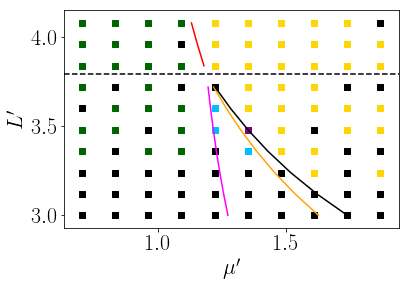

In [115]:
#faz o gráfico L x mu
#Parte 2) Verifique onde as populações sobrevivem e plote!
epsilon = 10E-5
#L = [1.0 + 0.12*j for j in range(0,Nl)] gamma < 1
L = [3 + 0.12*j for j in range(0,Nl)]
MU = [0.7 + 0.13*i for i in range(0,Nmu)]
MU1 = np.zeros(Nl)
MU2 = np.zeros(Nl)
MU3 = np.zeros(Nl)
MU4 = np.zeros(Nl)

#ax = plt.subplots(figsize=(8, 8))

for i in range (0,Nl):
    d_1 = D1/(L[i]**2)
    d_2 = D2/(L[i]**2)
    d_r = DR/(L[i]**2)
    #mus determinado pelo método variacional
    MU1[i] = mu_1()
    MU2[i] = mu_2()
    MU3[i] = mu_3()
    MU4[i] = mu_4()

    for j in range(0,Nmu):
        if Rfinal[i,j] > epsilon:
            if C1final[i,j] > epsilon:
                if C2final[i,j] > epsilon:
                    plt.scatter(MU[j],L[i],marker = 's',color = 'purple') #coexistência
                else:
                    plt.scatter(MU[j],L[i],marker = 's',color = 'deepskyblue') #R, C1
            elif C2final[i,j] > epsilon:
                plt.scatter(MU[j],L[i],marker = 's',color = 'gold') #R,C2
            else:
                plt.scatter(MU[j],L[i],marker = 's',color = 'darkgreen') #R
        else:
            plt.scatter(MU[j],L[i],marker = 's',color = 'black') #No one

#Mu_i's
if gamma < 1 and (D2/m2 - D1*gamma/m1)*1/(gamma - 1) > 0: #Coexistência se L > Lc
    newL = [L[i] for i in range(0,Nl) if L[i] < Lc()]
    plt.plot(MU1[len(newL):],L[len(newL):],color = 'magenta')
    plt.plot(MU2[len(newL):],L[len(newL):],color = 'orange')
    plt.plot(MU3[len(newL):],L[len(newL):],color = 'black')
    plt.plot(MU4[0:len(newL)],newL,color = 'red')
    
elif gamma < 1:
    plt.plot(MU1,L,color = 'blue')
    plt.plot(MU2,L,color = 'magenta')
    plt.plot(MU3,L,color = 'black')
    
elif gamma > 1 and (D2/m2 - D1*gamma/m1)*1/(gamma - 1) > 0: #Coexistência se L < Lc
    newL = [L[i] for i in range(0,Nl) if L[i] < Lc()]
    plt.plot(MU1[0:len(newL)],newL,color = 'magenta')
    plt.plot(MU2[0:len(newL)],newL,color = 'orange')
    plt.plot(MU3[0:len(newL)],newL,color = 'black')
    plt.plot(MU4[len(newL):],L[len(newL):],color = 'red')
    
elif gamma > 1:
    plt.plot(MU4,L,color = 'red')

#Lc

plt.axhline(y=Lc(), color='black', linestyle='--')


'''
d_1 = D1/(Lc()**2)
d_2 = D2/(Lc()**2)
d_r = DR/(Lc()**2)
plt.axvline(x=mu_4(), color='black', linestyle='--')
'''



print (Lc(),mu_1(),mu_2(),mu_3(),mu_4())

#plt.axis([0.7,2,3,4.1]) #Lembrar: gamma = 0.5 -> L [0.8,2.0] mu [0,25]. gamma = 1.5 -> L [1.5,2.7] mu [0,12.5]
plt.xlabel(r"$\mu'$")
plt.ylabel(r"$L'$")
#plt.title(r"$D_R = %.0f,D_1 = %.0f,D_2 = %.0f,\gamma = %.1f$" %(DR, D1, D2, gamma))
#plt.savefig("Plots/g%dD1%dDR%d.png" %(gamma*10,D1,DR))

#ENTENDER MELHOR O EFEITO DAS CONDIÇÕES INICIAIS

In [10]:
#Oscilações x L
#Gera os dados para fazer o gráfico L x mu
#L' = sqrt(m1)*(L/pi)
Nl = 10
L = [0.5 + 0.0125*j for j in range(0,Nl)]
mu = 15
t = np.linspace(0,Tmax,N)
m = 1.0
gamma = 0.5
alpha = 1
beta = 8
phi = 1.0
D = [[1.0,5.0,0.0]]
for d in D:
    print("D = " + str(d))
    D1,D2,DR = d[0],d[1],d[2]
    for l in L:
        d_1 = D1/(l**2) #O Numerador é o D do modelo antes de adimensionalizar!
        d_2 = D2/(l**2)
        d_r = DR/(l**2)
        
        R0,C10,C20 = init(M)
        y0 = np.r_[R0,C10,C20]
        
        sol = scipy.integrate.odeint(ddt,y0,t)
        sol = np.array(sol)
        np.save('Method_Of_LinesIGP_l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f,beta =%.3f'
                % (l,DR,D1,D2,mu,gamma,beta),sol)

D = [1.0, 5.0, 0.0]


D = [1.0, 5.0, 0.0]


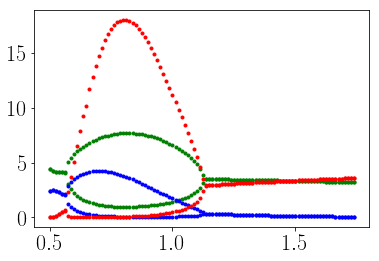

In [29]:
#Leia os dados e gere o gráfico Pop x L
Nl = 100
L = [0.5 + 0.0125*j for j in range(0,Nl)]
mu = 15
t = np.linspace(0,Tmax,N)
m = 1.0
gamma = 0.5
alpha = 1
beta = 8
phi = 1.0
D = [[1.0,5.0,0.0]]

RMAX = []
RMIN = []
C1MAX = []
C1MIN = []
C2MAX = []
C2MIN = []

for d in D:
    print("D = " + str(d))
    D1,D2,DR = d[0],d[1],d[2]
    for l in L:
        sol = np.load('Method_Of_LinesIGP_l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f,beta =%.3f.npy'
                % (l,DR,D1,D2,mu,gamma,beta))
        R = np.transpose(sol[:,0:M])
        C1 = np.transpose(sol[:,M:2*M])
        C2 = np.transpose(sol[:,2*M:])
        RMAX.append(np.max(R[M/2,-500:]))
        RMIN.append(np.min(R[M/2,-500:]))
        C1MAX.append(np.max(C1[M/2,-500:]))
        C1MIN.append(np.min(C1[M/2,-500:]))
        C2MAX.append(np.max(C2[M/2,-500:]))
        C2MIN.append(np.min(C2[M/2,-500:]))

plt.plot(L,RMAX,color = 'green',marker = '.',linestyle = "None")
plt.plot(L,RMIN,color = 'green',marker = '.',linestyle = "None")
plt.plot(L,C1MAX,color = 'blue',marker = '.',linestyle = "None")
plt.plot(L,C1MIN,color = 'blue',marker = '.',linestyle = "None")
plt.plot(L,C2MAX,color = 'red',marker = '.',linestyle = "None")
plt.plot(L,C2MIN,color = 'red',marker = '.',linestyle = "None")

In [7]:
#Em busca de ressonâncias (24/04/2018)
l = 0.5 + 35*0.0125
mu = 15
t = np.linspace(0,Tmax,N)
m = 1.0
gamma = 0.5
beta = 8
phi = 1.0
D = [[1.0,5.0,0.0]]
ALPHA = [0.0 + 0.1*j for j in range(0,31)]
for d in D:
    print("D = " + str(d))
    D1,D2,DR = d[0],d[1],d[2]
    d_1 = D1/(l**2) #O Numerador é o D do modelo antes de adimensionalizar!
    d_2 = D2/(l**2)
    d_r = DR/(l**2)
    for a in ALPHA:
        alpha = a
        
        R0,C10,C20 = init(M)
        y0 = np.r_[R0,C10,C20]
        
        sol = scipy.integrate.odeint(ddt,y0,t)
        sol = np.array(sol)
        #introduzindo mais um parâmetro!
        np.save('Method_Of_LinesIGP_l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f,beta =%.3f,alpha=%3f'
                % (l,DR,D1,D2,mu,gamma,beta,alpha),sol)

D = [1.0, 5.0, 0.0]


In [10]:
m1 = 0.95
m2 = 1.05
gamma = 1.4

#escolha os Ds
D1 = 2.0
D2 = 8.0
DR = 1.0

d_1 = D1/(Lc()**2)
d_2 = D2/(Lc()**2)
d_r = DR/(Lc()**2)

print(mu_4())
print((D2/m2 - D1*gamma/m1)*1/(gamma - 1))

1.12628982999
11.679197995
